In [177]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [178]:
## Reading the data :--

In [179]:
train = pd.read_csv('C:\\Users\\kaust\\Desktop\\Walmart Store Prediction case study\\trainMerged.csv')
train.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,10,2010-02-05,False,1,40212.84,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765
1,10,2010-02-05,False,98,74.00,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765
2,10,2010-02-05,False,32,26116.73,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765
3,10,2010-02-05,False,25,20779.50,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765
4,10,2010-02-05,False,34,50585.42,B,126512,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765


In [180]:
test = pd.read_csv('C:\\Users\\kaust\\Desktop\\Walmart Store Prediction case study\\testMerged.csv')
test.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,10,2012-11-02,False,1,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943
1,10,2012-11-02,False,72,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943
2,10,2012-11-02,False,71,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943
3,10,2012-11-02,False,21,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943
4,10,2012-11-02,False,67,B,126512,70.79,4.099,25680.2,6037.06,44.68,17412.04,4223.05,131.236226,6.943


In [181]:
features = pd.read_csv('C:\\Users\\kaust\\Desktop\\Walmart Store Prediction case study\\features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [182]:
stores = pd.read_csv('C:\\Users\\kaust\\Desktop\\Walmart Store Prediction case study\\stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [183]:
## Missing Value Treatment :--

In [184]:
train.isnull().sum()

Store                0
Date                 0
IsHoliday            0
Dept                 0
Weekly_Sales         0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [185]:
test.isnull().sum()

Store               0
Date                0
IsHoliday           0
Dept                0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [186]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [187]:
train["MarkDown1"]=train["MarkDown1"].fillna(0)
train["MarkDown2"]=train["MarkDown2"].fillna(0)
train["MarkDown3"]=train["MarkDown3"].fillna(0)
train["MarkDown4"]=train["MarkDown4"].fillna(0)
train["MarkDown5"]=train["MarkDown5"].fillna(0)
train.isnull().sum()

Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [188]:
test["MarkDown1"]=test["MarkDown1"].fillna(0)
test["MarkDown2"]=test["MarkDown2"].fillna(0)
test["MarkDown3"]=test["MarkDown3"].fillna(0)
test["MarkDown4"]=test["MarkDown4"].fillna(0)
test["CPI"]=test["CPI"].fillna(test["CPI"].mean())
test["Unemployment"]=test["Unemployment"].fillna(test["Unemployment"].mean())
test.isnull().sum()

Store           0
Date            0
IsHoliday       0
Dept            0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# Exploring the data:--

In [189]:
train.dtypes

Store             int64
Date             object
IsHoliday          bool
Dept              int64
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [190]:
test.dtypes

Store             int64
Date             object
IsHoliday          bool
Dept              int64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [191]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [192]:
train["IsHoliday"]=np.where((train["IsHoliday"]==False),0,1)

In [193]:
test["IsHoliday"]=np.where((test["IsHoliday"]==False),0,1)

In [194]:
final_train = train.sort_values(by="Date") 

In [195]:
final_test = test.sort_values(by="Date") 

In [196]:
# Size of each Store Type--

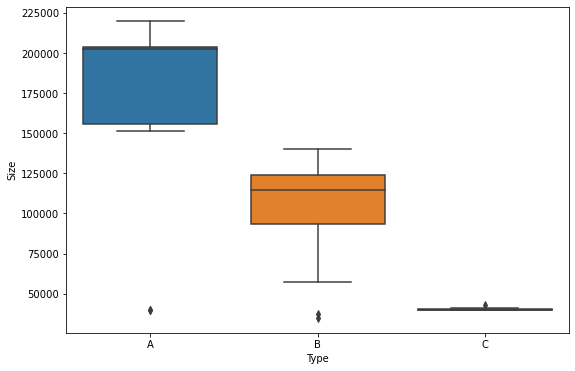

In [197]:
plt.figure(figsize=(9,6))
sns.boxplot(x='Type', y='Size', data=stores)

In [198]:
# Total Weekly Sales made by each Store Type--

In [199]:
x=pd.DataFrame(final_train.groupby(["Type"])["Weekly_Sales"].sum())

In [200]:
x=x["Weekly_Sales"].astype("int64")

In [201]:
x=pd.DataFrame(x)
x

,Weekly_Sales
Type,
A,4331014722
B,2000700736
C,405503527


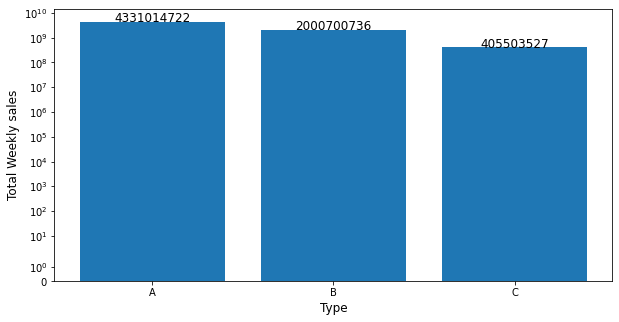

In [202]:
plt.figure(figsize=(10,5))
plt.bar(x.index,x["Weekly_Sales"])
plt.yscale("symlog")
plt.xlabel("Type",fontsize=12)
plt.ylabel("Total Weekly sales",fontsize=12)
for i,v in enumerate(x["Weekly_Sales"]):
    plt.text(i,v,str(v),fontsize=12,ha="center")

In [203]:
# Total Weekly Sales made on Holidays and Non-Holidays--

In [204]:
y=pd.DataFrame(final_train.groupby(["IsHoliday"])["Weekly_Sales"].sum())

In [205]:
y=y["Weekly_Sales"].astype("int64")

In [206]:
y=pd.DataFrame(y)
y

,Weekly_Sales
IsHoliday,
0,6231919435
1,505299551


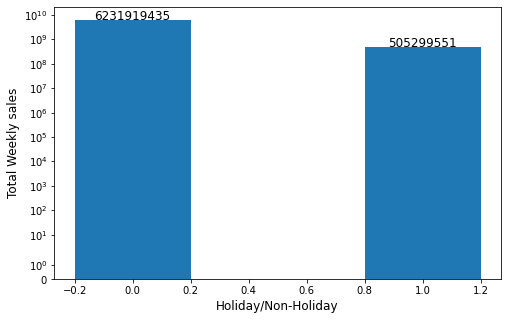

In [207]:
plt.figure(figsize=(8,5))
plt.bar(y.index,y["Weekly_Sales"],width=0.4)
plt.yscale("symlog")
plt.xlabel("Holiday/Non-Holiday",fontsize=12)
plt.ylabel("Total Weekly sales",fontsize=12)
for i,v in enumerate(y["Weekly_Sales"]):
    plt.text(i,v,str(v),fontsize=12,ha="center")

In [ ]:
# Relation between services--

In [208]:
final_train.corr()

,Store,IsHoliday,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,-0.000548,0.024004,-0.085195,-0.182881,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552
IsHoliday,-0.000548,1.000000,0.000916,0.012774,0.000593,-0.155949,-0.078281,-0.003521,0.207604,0.266471,0.011565,-0.015235,-0.001944,0.010460
Dept,0.024004,0.000916,1.000000,0.148032,-0.002966,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.007837
Weekly_Sales,-0.085195,0.012774,0.148032,1.000000,0.243828,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,-0.025864
Size,-0.182881,0.000593,-0.002966,0.243828,1.000000,-0.058313,0.003361,0.169788,0.078372,0.033641,0.127334,0.153011,-0.003314,-0.068238
Temperature,-0.050097,-0.155949,0.004437,-0.002312,-0.058313,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730
Fuel_Price,0.065290,-0.078281,0.003572,-0.000120,0.003361,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853
MarkDown1,-0.059844,-0.003521,0.001494,0.047172,0.169788,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168
MarkDown2,-0.033829,0.207604,0.000587,0.020716,0.078372,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427
MarkDown3,-0.020331,0.266471,0.001475,0.038562,0.033641,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078


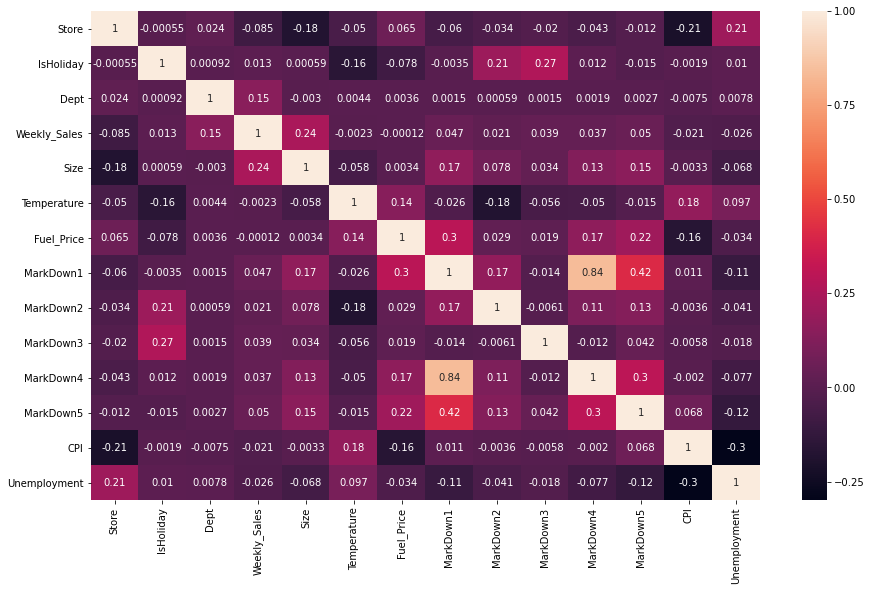

In [209]:
plt.figure(figsize=(15,9))
sns.heatmap(final_train.corr(),annot=True)

In [210]:
# Splitting date into year, month and day--

In [214]:
final_train["Year"]=pd.DatetimeIndex(final_train["Date"]).year

In [215]:
final_train["Month"]=pd.DatetimeIndex(final_train["Date"]).month

In [216]:
final_train["Day"]=pd.DatetimeIndex(final_train["Date"]).day

In [217]:
final_test["Year"]=pd.DatetimeIndex(final_test["Date"]).year

In [218]:
final_test["Month"]=pd.DatetimeIndex(final_test["Date"]).month

In [219]:
final_test["Day"]=pd.DatetimeIndex(final_test["Date"]).day

In [220]:
# Treating categorical variables--

In [221]:
tr=pd.get_dummies(final_train["Type"])

In [222]:
te=pd.get_dummies(final_test["Type"])

In [223]:
train_new=pd.concat([final_train,tr],axis=1)

In [224]:
train_new.head()

,Store,Date,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,A,B,C
0,10,2010-02-05,0,1,40212.84,B,126512,54.34,2.962,0.0,...,0.0,0.0,126.442065,9.765,2010,2,5,0,1,0
272805,35,2010-02-05,0,6,11437.81,B,103681,27.19,2.784,0.0,...,0.0,0.0,135.352461,9.262,2010,2,5,0,1,0
272806,35,2010-02-05,0,25,13661.25,B,103681,27.19,2.784,0.0,...,0.0,0.0,135.352461,9.262,2010,2,5,0,1,0
272807,35,2010-02-05,0,24,12180.85,B,103681,27.19,2.784,0.0,...,0.0,0.0,135.352461,9.262,2010,2,5,0,1,0
272808,35,2010-02-05,0,36,1982.00,B,103681,27.19,2.784,0.0,...,0.0,0.0,135.352461,9.262,2010,2,5,0,1,0


In [225]:
train_new.dtypes

Store             int64
Date             object
IsHoliday         int32
Dept              int64
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Year              int64
Month             int64
Day               int64
A                 uint8
B                 uint8
C                 uint8
dtype: object

In [226]:
test_new=pd.concat([final_test,te],axis=1)

In [227]:
test_new.head()

,Store,Date,IsHoliday,Dept,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,A,B,C
0,10,2012-11-02,0,1,B,126512,70.79,4.099,25680.20,6037.06,...,17412.04,4223.05,131.236226,6.943,2012,11,2,0,1,0
74212,35,2012-11-02,0,31,B,103681,54.44,3.787,9427.41,3322.67,...,3119.64,1982.11,142.661460,8.665,2012,11,2,0,1,0
74213,35,2012-11-02,0,22,B,103681,54.44,3.787,9427.41,3322.67,...,3119.64,1982.11,142.661460,8.665,2012,11,2,0,1,0
74214,35,2012-11-02,0,56,B,103681,54.44,3.787,9427.41,3322.67,...,3119.64,1982.11,142.661460,8.665,2012,11,2,0,1,0
74215,35,2012-11-02,0,54,B,103681,54.44,3.787,9427.41,3322.67,...,3119.64,1982.11,142.661460,8.665,2012,11,2,0,1,0


In [228]:
test_new.dtypes

Store             int64
Date             object
IsHoliday         int32
Dept              int64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Year              int64
Month             int64
Day               int64
A                 uint8
B                 uint8
C                 uint8
dtype: object

In [229]:
train_new=train_new.drop(['Date','Type'],axis=1)

In [230]:
train_new.head()

,Store,IsHoliday,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,A,B,C
0,10,0,1,40212.84,126512,54.34,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,9.765,2010,2,5,0,1,0
272805,35,0,6,11437.81,103681,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,2010,2,5,0,1,0
272806,35,0,25,13661.25,103681,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,2010,2,5,0,1,0
272807,35,0,24,12180.85,103681,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,2010,2,5,0,1,0
272808,35,0,36,1982.00,103681,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,2010,2,5,0,1,0


In [231]:
test_new=test_new.drop(['Date','Type'],axis=1)

In [232]:
test_new.head()

,Store,IsHoliday,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,A,B,C
0,10,0,1,126512,70.79,4.099,25680.20,6037.06,44.68,17412.04,4223.05,131.236226,6.943,2012,11,2,0,1,0
74212,35,0,31,103681,54.44,3.787,9427.41,3322.67,31.30,3119.64,1982.11,142.661460,8.665,2012,11,2,0,1,0
74213,35,0,22,103681,54.44,3.787,9427.41,3322.67,31.30,3119.64,1982.11,142.661460,8.665,2012,11,2,0,1,0
74214,35,0,56,103681,54.44,3.787,9427.41,3322.67,31.30,3119.64,1982.11,142.661460,8.665,2012,11,2,0,1,0
74215,35,0,54,103681,54.44,3.787,9427.41,3322.67,31.30,3119.64,1982.11,142.661460,8.665,2012,11,2,0,1,0


In [233]:
train_new.columns

Index(['Store', 'IsHoliday', 'Dept', 'Weekly_Sales', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'A', 'B',
       'C'],
      dtype='object')

In [234]:
test_new.columns

Index(['Store', 'IsHoliday', 'Dept', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Year', 'Month', 'Day', 'A', 'B', 'C'],
      dtype='object')

In [ ]:
# Building Models:--

In [235]:
x_train, x_test, y_train, y_test=train_test_split(train_new[['Store', 'IsHoliday', 'Dept', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown3', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'A', 'B',
       'C']],train_new["Weekly_Sales"],test_size=0.3,random_state=125)

In [236]:
# Linear Regression--

In [237]:
lm=LinearRegression(normalize=True)

In [238]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [239]:
pre1=lm.predict(x_test)

In [240]:
pre1

array([13792., 23692., 32260., ..., 13400., 12708., 19688.])

Text(0, 0.5, 'Predicted Sales')

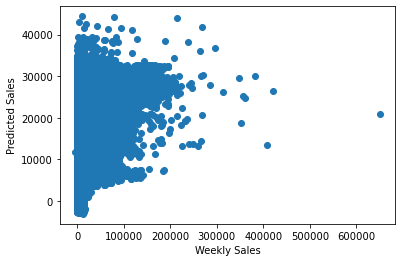

In [242]:
plt.scatter(y_test,pre1)
plt.xlabel("Weekly Sales")
plt.ylabel("Predicted Sales")

In [243]:
mae1=metrics.mean_absolute_error(y_test,pre1)
mae1

14566.88581746013

In [244]:
rmse1=np.sqrt(metrics.mean_squared_error(y_test,pre1))
rmse1

21671.937728673398

In [245]:
acc1=lm.score(x_test,y_test)
acc1

0.09160718029184411

In [246]:
# Random Forest Regressor--

In [247]:
rf=RandomForestRegressor()

In [248]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [249]:
pre2=rf.predict(x_test)

In [250]:
pre2

array([ 4002.66 , 24351.919, 32557.531, ...,  6348.709,  7553.827,
        3061.866])

Text(0, 0.5, 'Predicted Sales')

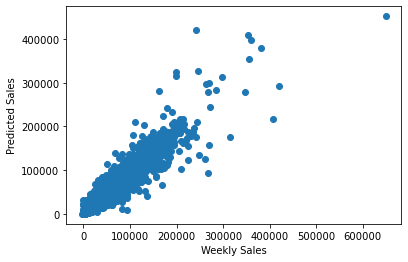

In [251]:
plt.scatter(y_test,pre2)
plt.xlabel("Weekly Sales")
plt.ylabel("Predicted Sales")

In [252]:
mae2=metrics.mean_absolute_error(y_test,pre2)
mae2

1493.6302191885884

In [253]:
rmse2=np.sqrt(metrics.mean_squared_error(y_test,pre2))
rmse2

3744.0055720012715

In [254]:
acc2=rf.score(x_test,y_test)
acc2

0.9728886479028365

In [255]:
# Decision Tree Regressor--

In [256]:
dt=DecisionTreeRegressor()

In [257]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [258]:
pre3=dt.predict(x_test)

In [259]:
pre3

array([ 6191.  , 23610.08, 31925.72, ...,  6127.86,  8533.82,  3082.14])

Text(0, 0.5, 'Predicted Sales')

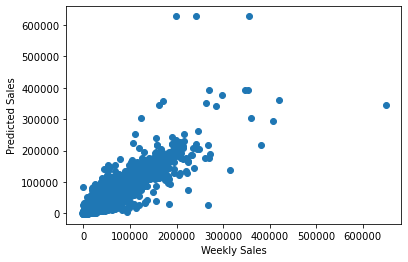

In [260]:
plt.scatter(y_test,pre3)
plt.xlabel("Weekly Sales")
plt.ylabel("Predicted Sales")

In [261]:
mae3=metrics.mean_absolute_error(y_test,pre3)
mae3

1868.237839900056

In [262]:
rmse3=np.sqrt(metrics.mean_squared_error(y_test,pre3))
rmse3

5045.206987152671

In [263]:
acc3=dt.score(x_test,y_test)
acc3

0.9507692806689235

In [264]:
# KNN Regressor--

In [265]:
knn=KNeighborsRegressor(n_neighbors=10,n_jobs=5)

In [266]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=5, n_neighbors=10, p=2,
          weights='uniform')

In [267]:
pre4=knn.predict(x_test)

In [268]:
pre4

array([18003.49 , 37752.026, 83735.669, ...,  9583.45 ,  6168.688,
        3235.527])

Text(0, 0.5, 'Predicted Sales')

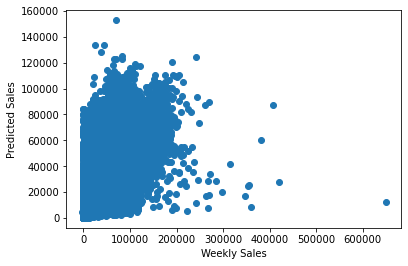

In [269]:
plt.scatter(y_test,pre4)
plt.xlabel("Weekly Sales")
plt.ylabel("Predicted Sales")

In [270]:
mae4=metrics.mean_absolute_error(y_test,pre4)
mae4

11042.358467348246

In [271]:
rmse4=np.sqrt(metrics.mean_squared_error(y_test,pre4))
rmse4

18008.71838075949

In [272]:
acc4=knn.score(x_test,y_test)
acc4

0.3727454536642799

In [273]:
# Model Comparision--

In [274]:
df=pd.DataFrame(columns=["Model", "Mean Absolute Error", "Root Mean Squared Error", "Accuracy"])
df=df.append({'Model': "Linear Regression", 'Mean Absolute Error': mae1, 'Root Mean Squared Error': rmse1, "Accuracy": acc1}, 
             ignore_index=True)
df=df.append({'Model': "Random Forest Regressor", 'Mean Absolute Error': mae2, 'Root Mean Squared Error': rmse2, "Accuracy": 
              acc2}, ignore_index=True)
df=df.append({'Model': "Decision Tree Regressor", 'Mean Absolute Error': mae3, 'Root Mean Squared Error': rmse3, "Accuracy": 
              acc3}, ignore_index=True)
df=df.append({'Model': "KNN Regressor", 'Mean Absolute Error': mae4, 'Root Mean Squared Error': rmse4, "Accuracy": acc4}, 
             ignore_index=True)

In [275]:
df

,Model,Mean Absolute Error,Root Mean Squared Error,Accuracy
0,Linear Regression,14566.885817,21671.937729,0.091607
1,Random Forest Regressor,1493.630219,3744.005572,0.972889
2,Decision Tree Regressor,1868.237840,5045.206987,0.950769
3,KNN Regressor,11042.358467,18008.718381,0.372745


In [ ]:
## Comparing the models above we find out that Random Forest Regressor model is most accurate and shows lesser chances of errors
## than the other models. Hence, we choose Random Forest Regressor model for predicting the sales.

In [297]:
pred=pd.DataFrame(pre2,columns=["Predicted Weekly Sales"])
pred

,Predicted Weekly Sales
0,4002.660
1,24351.919
2,32557.531
3,1799.805
4,8748.064
...,...
126466,16873.815
126467,18000.443
126468,6348.709
126469,7553.827


In [300]:
y=pd.DataFrame(y_test)
y

,Weekly_Sales
155165,6940.00
406751,25276.01
334604,34019.15
242452,1865.35
230475,7479.77
...,...
414645,16297.74
58132,13969.98
174830,5090.83
140385,7912.03


In [ ]:
## Finding percentage change between Total Original sales and Predicted sales:--

In [301]:
# Total Predicted sales--

In [302]:
rfm=pre2.sum()

In [303]:
rfm

2030524574.4309998

In [304]:
# Total Weekly sales--

In [305]:
pre=y_test.sum()

In [306]:
pre

2025987458.6399999

In [307]:
# Percentage Change-- 

In [309]:
((rfm-pre)/pre)*100

0.2239458971797167

In [ ]:
## Hence, we find out that the sales would increase by 0.22% according to the prediction by Random Forest Regressor Model  